In [19]:
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torchvision.datasets import ImageFolder

In [20]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [21]:
train_transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

transforms = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(256),
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

In [22]:
train_path = 'Train/'
test_path = 'Test/'
val_path = 'Validation/'

train_set = ImageFolder(root=train_path, transform=train_transforms)
test_set = ImageFolder(root=test_path, transform=transforms)
val_set = ImageFolder(root=val_path, transform=transforms)

batch_size = 64

train_loader = DataLoader(train_set, batch_size=batch_size, shuffle=True, num_workers=6)
test_loader = DataLoader(test_set, batch_size=batch_size, shuffle=True, num_workers=6)
val_loader = DataLoader(val_set, batch_size=batch_size, shuffle=True, num_workers=6)

In [23]:
for image, label in train_loader:
    print(image.size())
    print(label.size())
    break

torch.Size([64, 3, 256, 256])
torch.Size([64])


Labels: tensor([1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
        1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1])


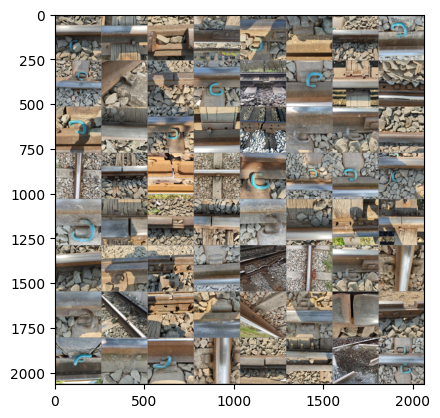

In [24]:
import matplotlib.pyplot as plt
import numpy as np

def imshow(img):
    img = img * 0.5 + 0.5  # Unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(train_loader)
images, labels = next(dataiter)

print("Labels:", labels)
imshow(torchvision.utils.make_grid(images))

In [37]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.seqconv = nn.Sequential(
            nn.Conv2d(3, 7, 2, 1, 2),
            nn.AvgPool2d(2),
            nn.Conv2d(7, 14, 2, 1, 2)
            )

        self.seqlin = None

        self._initialize_fc()

    def _initialize_fc(self):
        model_input = torch.zeros(64, 3, 256, 256)

        x = self.seqconv(model_input)
        flattened_size = x.view(x.size(0), -1).size(1)

        self.seqlin = nn.Sequential(
            nn.Linear(flattened_size, 512),
            nn.ReLU(),
            nn.Linear(512, 256),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.Dropout(0.3),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 2)
        )


In [38]:
model = Model()
print(model)

Model(
  (seqconv): Sequential(
    (0): Conv2d(3, 7, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
    (1): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (2): Conv2d(7, 14, kernel_size=(2, 2), stride=(1, 1), padding=(2, 2))
  )
  (seqlin): Sequential(
    (0): Linear(in_features=243936, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=256, bias=True)
    (3): Dropout(p=0.3, inplace=False)
    (4): ReLU()
    (5): Linear(in_features=256, out_features=128, bias=True)
    (6): Dropout(p=0.3, inplace=False)
    (7): ReLU()
    (8): Linear(in_features=128, out_features=64, bias=True)
    (9): ReLU()
    (10): Linear(in_features=64, out_features=32, bias=True)
    (11): ReLU()
    (12): Linear(in_features=32, out_features=2, bias=True)
  )
)
